In [4]:
#--- Import Pandas ---
import pandas as pd

#--- Read in dataset ----
file_path=r"C:\Users\003UWG744\Downloads\flipkart_reviews.csv"
df = pd.read_csv(file_path)
df


,Product_name,Review,Rating
0,Lenovo Ideapad Gaming 3 Ryzen 5 Hexa Core 5600...,Best under 60k Great performanceI got it for a...,5.0
1,Lenovo Ideapad Gaming 3 Ryzen 5 Hexa Core 5600...,Good perfomence...,5.0
2,Lenovo Ideapad Gaming 3 Ryzen 5 Hexa Core 5600...,Great performance but usually it has also that...,5.0
3,DELL Inspiron Athlon Dual Core 3050U - (4 GB/2...,My wife is so happy and best product 👌🏻😘,5.0
4,DELL Inspiron Athlon Dual Core 3050U - (4 GB/2...,"Light weight laptop with new amazing features,...",5.0
...,...,...,...
2299,MSI 27 inch Full HD IPS Panel Monitor (PRO MP2...,"Great display, accurate colours at this price ...",5.0
2300,MSI 27 inch Full HD IPS Panel Monitor (PRO MP2...,Superb monitor first brought 1 used for 2 mont...,5.0
2301,MSI 27 inch Full HD IPS Panel Monitor (PRO MP2...,Awesome,5.0
2302,MSI 27 inch Full HD IPS Panel Monitor (PRO MP2...,Only one issue with adapter,5.0


In [8]:
cleaned_data=df.dropna()
cleaned_data

,Product_name,Review,Rating
0,Lenovo Ideapad Gaming 3 Ryzen 5 Hexa Core 5600...,Best under 60k Great performanceI got it for a...,5.0
1,Lenovo Ideapad Gaming 3 Ryzen 5 Hexa Core 5600...,Good perfomence...,5.0
2,Lenovo Ideapad Gaming 3 Ryzen 5 Hexa Core 5600...,Great performance but usually it has also that...,5.0
3,DELL Inspiron Athlon Dual Core 3050U - (4 GB/2...,My wife is so happy and best product 👌🏻😘,5.0
4,DELL Inspiron Athlon Dual Core 3050U - (4 GB/2...,"Light weight laptop with new amazing features,...",5.0
...,...,...,...
2298,MSI 27 inch Full HD IPS Panel Monitor (PRO MP2...,"Cool and best in below 9000 prize range ,go fo...",5.0
2299,MSI 27 inch Full HD IPS Panel Monitor (PRO MP2...,"Great display, accurate colours at this price ...",5.0
2300,MSI 27 inch Full HD IPS Panel Monitor (PRO MP2...,Superb monitor first brought 1 used for 2 mont...,5.0
2301,MSI 27 inch Full HD IPS Panel Monitor (PRO MP2...,Awesome,5.0


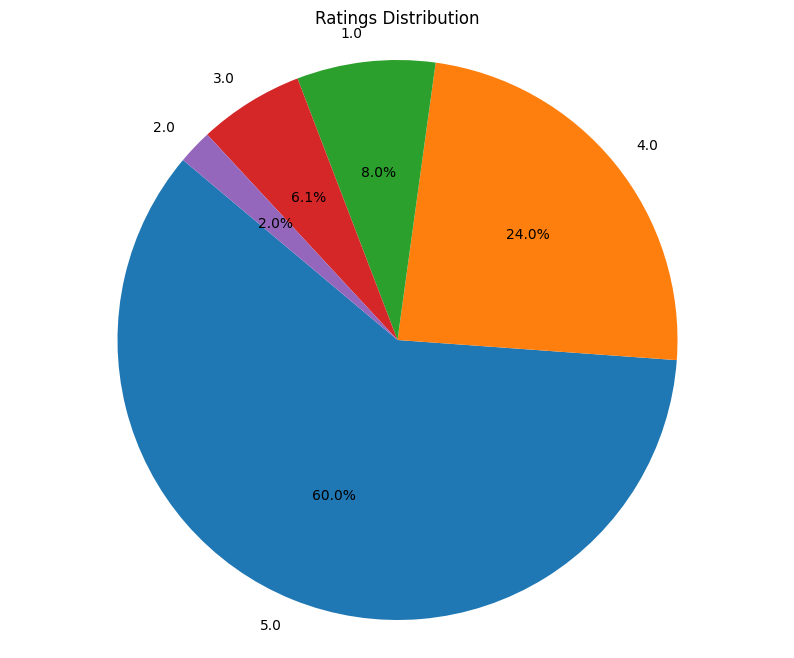

5.0    1381
4.0     552
1.0     184
3.0     140
2.0      46
Name: Rating, dtype: int64

In [21]:
import matplotlib.pyplot as plt
ratings=cleaned_data['Rating'].value_counts()
numbers=ratings.index
quantity=ratings.values
plt.figure(figsize=(10,8))
plt.pie(quantity,labels=ratings.index,autopct='%1.1f%%',startangle=140)
plt.axis('equal')
plt.title('Ratings Distribution')
plt.show()
ratings

In [23]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\003UWG744\AppData\Roaming\nltk_data...


True

In [29]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
data=pd.DataFrame(cleaned_data['Review'])
sentiments=SentimentIntensityAnalyzer()
data['Positive']=[sentiments.polarity_scores(review)['pos']for review in data['Review']]
data['Negative']=[sentiments.polarity_scores(review)['neg']for review in data['Review']]
data['Neutral']=[sentiments.polarity_scores(review)['neu']for review in data['Review']]
print(data)


                                                 Review  Positive  Negative  \
0     Best under 60k Great performanceI got it for a...     0.314     0.073   
1                                    Good perfomence...     0.744     0.000   
2     Great performance but usually it has also that...     0.119     0.000   
3              My wife is so happy and best product 👌🏻😘     0.568     0.000   
4     Light weight laptop with new amazing features,...     0.467     0.000   
...                                                 ...       ...       ...   
2298  Cool and best in below 9000 prize range ,go fo...     0.551     0.000   
2299  Great display, accurate colours at this price ...     0.369     0.000   
2300  Superb monitor first brought 1 used for 2 mont...     0.255     0.000   
2301                                            Awesome     1.000     0.000   
2302                        Only one issue with adapter     0.000     0.000   

      Neutral  
0       0.613  
1       0.256  
2  

In [35]:
x=round(data['Positive'].sum(),2)
y=round(data['Negative'].sum(),2)
z=round(data['Neutral'].sum(),2)
print(x,'\n',y,'\n',z)

835.34 
 104.92 
 1362.74
